<a href="https://colab.research.google.com/github/appliedcode/mthree-c422/blob/mthree-c422-Avantika/Data_Ethics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice Exercise Set: Data Ethics — Hands-On with Code

Covers: Data Collection \& Consent, Bias, Minimization, Anonymization, Risks, Governance, Quality, Sharing, and Monitoring.

***

## 1. Data Collection, Privacy \& Consent

### Exercise 1.1 — Consent Simulation and Filtering

- Generate synthetic user data with various consent types (explicit, implicit, none).
- Write function to filter out records lacking valid consent.

In [1]:
import pandas as pd
import numpy as np

np.random.seed(2025)
n = 500

# Synthetic user data with consent types
consent_types = ["explicit", "implicit", "none"]
data = pd.DataFrame({
    "User_ID": range(1, n+1),
    "Age": np.random.randint(18, 80, n),
    "Gender": np.random.choice(["Male", "Female", "Other"], n, p=[0.48, 0.48, 0.04]),
    "Consent_Type": np.random.choice(consent_types, n, p=[0.6, 0.3, 0.1])
})

# Filter function: keep only explicit or implicit consent
def filter_valid_consent(df):
    valid = df[df["Consent_Type"].isin(["explicit", "implicit"])]
    return valid

valid_data = filter_valid_consent(data)
print(f"Total records: {len(data)}; Records with valid consent: {len(valid_data)}")

Total records: 500; Records with valid consent: 447


*Explanation:* The function ensures only records with valid consent are used, respecting privacy and legal constraints.

***

## 2. Bias in Data

### Exercise 2.1 — Detect Gender Bias in Outcome

- Add a biased outcome variable where males tend to respond more positively.
- Calculate and visualize positive response rates by gender.

Gender
Female    0.355856
Male      0.584980
Other     0.480000
Name: Response, dtype: float64


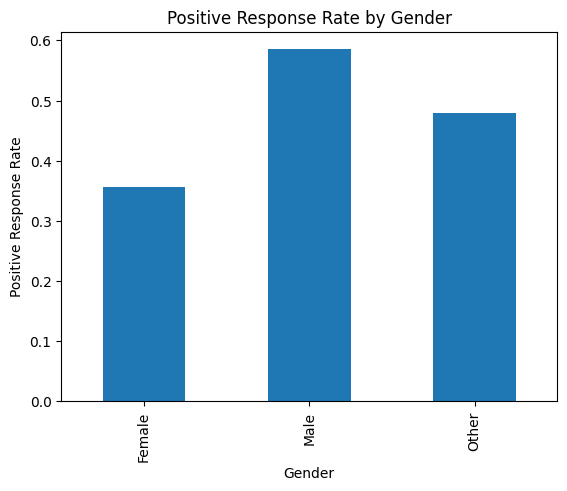

In [2]:
import matplotlib.pyplot as plt

# Add biased outcome variable
data["Response"] = np.random.choice([0, 1], n, p=[0.6, 0.4])
male_mask = data["Gender"] == "Male"
data.loc[male_mask, "Response"] = np.random.choice([0, 1], male_mask.sum(), p=[0.4, 0.6])

# Calculate positive response rates by Gender
response_rates = data.groupby("Gender")["Response"].mean()
print(response_rates)

# Visualize
response_rates.plot(kind="bar", title="Positive Response Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Positive Response Rate")
plt.show()


***

## 3. Data Minimization

### Exercise 3.1 — Keep Only Essential Features

- Select columns necessary for analysis and remove others.


In [3]:
# Minimal dataset for analysis
minimal_data = data[["User_ID", "Age", "Gender", "Response"]]
print(minimal_data.head())

   User_ID  Age  Gender  Response
0        1   48  Female         0
1        2   36  Female         0
2        3   48    Male         1
3        4   30  Female         0
4        5   74  Female         0


*Explanation:*
Retaining only necessary data reduces privacy risks and potential misuse.

***

## 4. Anonymization \& Pseudonymization

### Exercise 4.1 — Pseudonymize User Identifiers

- Use SHA-256 hashing to pseudonymize User_ID.

In [4]:
import hashlib

data["User_PseudoID"] = data["User_ID"].apply(lambda x: hashlib.sha256(str(x).encode()).hexdigest())
print(data[["User_ID", "User_PseudoID"]].head())

   User_ID                                      User_PseudoID
0        1  6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...
1        2  d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...
2        3  4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...
3        4  4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...
4        5  ef2d127de37b942baad06145e54b0c619a1f22327b2ebb...



*Explanation:*
Pseudonymization allows data utility without directly exposing identities.

***

## 5. De-Anonymization Risks

### Exercise 5.1 — Simulate Linkage Attack

- Using auxiliary data, attempt naive re-identification by demographic matching.

In [5]:
# Auxiliary dataset with demographics
aux_data = data[["User_PseudoID", "Age", "Gender"]].sample(100, random_state=1)

# Attempt match on Age & Gender to re-identify
merged = pd.merge(data, aux_data.drop(columns=["User_PseudoID"]), on=["Age", "Gender"])
print(f"Possible re-identifications found: {len(merged)}")

Possible re-identifications found: 458


*Explanation:*
Matches indicate risk in current anonymization, highlighting need for stronger privacy methods.

***

## 6. Data Governance \& Stewardship

### Exercise 6.1 — Define Roles and Access Control

- Simulate a data access matrix for Admin vs Analyst.

In [6]:
access_control = pd.DataFrame({
    "Field": ["User_ID", "Age", "Gender", "Response", "Sensitive_Info"],
    "Admin": ["Read/Write"]*5,
    "Analyst": ["No Access", "Read", "Read", "Read", "No Access"]
})

print(access_control)

            Field       Admin    Analyst
0         User_ID  Read/Write  No Access
1             Age  Read/Write       Read
2          Gender  Read/Write       Read
3        Response  Read/Write       Read
4  Sensitive_Info  Read/Write  No Access


*Explanation:*
Clear roles and permissions promote responsible data stewardship.

***

## 7. Data Quality \& Lineage

### Exercise 7.1 — Check Missing and Invalid Data

In [7]:
print("Missing values per column:\n", data.isnull().sum())
print("Invalid age entries (negative age):", (data["Age"] < 0).sum())

Missing values per column:
 User_ID          0
Age              0
Gender           0
Consent_Type     0
Response         0
User_PseudoID    0
dtype: int64
Invalid age entries (negative age): 0


*Explanation:*
Data quality checks detect issues that could affect analysis and decision-making.

***

## 8. Ethical Data Sharing

### Exercise 8.1 — Simulate Data Sharing Approval Logic

In [8]:
def approve_data_sharing(request_type):
    if request_type == "aggregated":
        return True
    elif request_type == "anonymized":
        return True
    elif request_type == "full":
        return False  # restrict full raw data sharing
    else:
        return False

requests = ["aggregated", "anonymized", "full", "unknown"]
for req in requests:
    print(f"Request '{req}': {'Approved' if approve_data_sharing(req) else 'Denied'}")

Request 'aggregated': Approved
Request 'anonymized': Approved
Request 'full': Denied
Request 'unknown': Denied


*Explanation:*
Policy-based approval helps enforce ethical sharing practices.

***

## 9. Monitoring \& Compliance

### Exercise 9.1 — Alert on Bias and Consent Compliance

In [9]:
# Calculate response disparity by gender
disparity = response_rates.max() - response_rates.min()
threshold = 0.15

if disparity > threshold:
    print(f"⚠️ Alert: Gender bias disparity {disparity:.2f} exceeds threshold {threshold}")
else:
    print(f"✅ Bias disparity {disparity:.2f} within acceptable limit")

# Consent compliance check
valid_consent_ratio = len(valid_data) / len(data)
if valid_consent_ratio < 0.9:
    print(f"⚠️ Alert: Consent compliance low ({valid_consent_ratio:.2f})")
else:
    print(f"✅ Consent compliance good ({valid_consent_ratio:.2f})")

⚠️ Alert: Gender bias disparity 0.23 exceeds threshold 0.15
⚠️ Alert: Consent compliance low (0.89)


*Explanation:*
Ongoing monitoring ensures ethical standards are maintained.

***